In [23]:
#Prepare dataset
#Determine optimal number of clusters
#Create GMM model
#Interprete the model

#Directory, Libraries, and Data

In [24]:
%cd /content/drive/MyDrive/Business Analyst course/Segmentation/Gaussian Mixture Model

/content/drive/MyDrive/Business Analyst course/Segmentation/Gaussian Mixture Model


In [25]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.mixture import GaussianMixture

In [26]:
#Load the data
df=pd.read_csv("CC GENERAL.csv").dropna()
df.head()

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.40,0.00,95.40,0.000000,0.166667,0.000000,0.083333,0.00,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.00,6442.945483,0.000000,0.000000,0.000000,0.25,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.00,0.000000,1.000000,1.000000,0.000000,0.00,0,12,7500.0,622.066742,627.284787,0.000000,12
4,C10005,817.714335,1.000000,16.00,16.00,0.00,0.000000,0.083333,0.083333,0.000000,0.00,0,1,1200.0,678.334763,244.791237,0.000000,12
5,C10006,1809.828751,1.000000,1333.28,0.00,1333.28,0.000000,0.666667,0.000000,0.583333,0.00,0,8,1800.0,1400.057770,2407.246035,0.000000,12


#Gaussian Mixture Model

In [27]:
#Creating DF without customer ID
data=df.iloc[:,1:]
data.head()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,40.900749,0.818182,95.40,0.00,95.40,0.000000,0.166667,0.000000,0.083333,0.00,0,2,1000.0,201.802084,139.509787,0.000000,12
1,3202.467416,0.909091,0.00,0.00,0.00,6442.945483,0.000000,0.000000,0.000000,0.25,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,2495.148862,1.000000,773.17,773.17,0.00,0.000000,1.000000,1.000000,0.000000,0.00,0,12,7500.0,622.066742,627.284787,0.000000,12
4,817.714335,1.000000,16.00,16.00,0.00,0.000000,0.083333,0.083333,0.000000,0.00,0,1,1200.0,678.334763,244.791237,0.000000,12
5,1809.828751,1.000000,1333.28,0.00,1333.28,0.000000,0.666667,0.000000,0.583333,0.00,0,8,1800.0,1400.057770,2407.246035,0.000000,12


Text(0.5, 0, 'Number of Components')

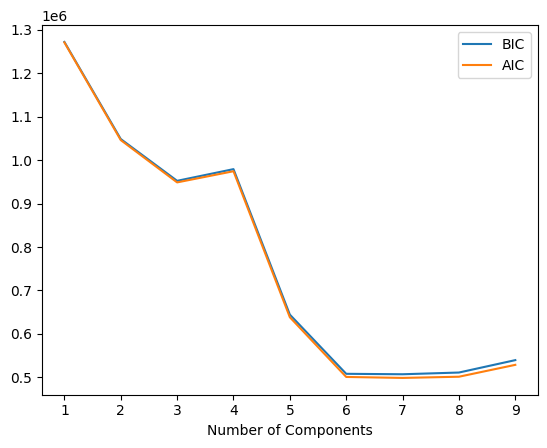

In [28]:
#Finding optimal number of clusters
#Prepare
n_components=np.arange(1,10)

#Create GMM Model
models=[GaussianMixture(n_components=n,
                        random_state=1502).fit(data)for n in n_components]

#Plot
plt.plot(n_components,
         [m.bic(data) for m in models],
         label='BIC')

plt.plot(n_components,
         [m.aic(data) for m in models],
         label='AIC')
plt.legend()
plt.xlabel('Number of Components')

In [29]:
#Gaussian Mixture Model
model=GaussianMixture(n_components=6,
                      random_state=1502).fit(data)

#Interpretation

In [30]:
#Predict the cluster for each customer
cluster=pd.Series(model.predict(data))
cluster[:2]

0    1
1    3
dtype: int64

In [31]:
#Create cluster variable
df['cluster']=cluster
df.head(2)

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,cluster
0,C10001,40.900749,0.818182,95.4,0.0,95.4,0.000000,0.166667,0.0,0.083333,0.00,0,2,1000.0,201.802084,139.509787,0.000000,12,1.0
1,C10002,3202.467416,0.909091,0.0,0.0,0.0,6442.945483,0.000000,0.0,0.000000,0.25,4,0,7000.0,4103.032597,1072.340217,0.222222,12,3.0


In [32]:
#Check how many people per cluster
df.cluster.value_counts()

5.0    2499
3.0    1852
1.0    1613
4.0    1287
0.0     907
2.0     181
Name: cluster, dtype: int64

In [34]:
#Interpretation
pd.DataFrame(model.means_,
             columns=list(df.iloc[:,1:-1].columns))

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,1443.069999,0.885712,1108.231253,749.030320,359.200933,1912.197808,0.564574,0.277613,0.372164,0.266222,6.157609,15.438683,4237.825014,2567.713418,652.745666,0.142087,10.708183
1,161.868025,0.643264,678.050213,357.186392,320.863821,0.000000,0.521176,0.141998,0.382344,0.000000,0.000000,9.012351,3772.228386,893.737061,140.270580,0.329065,11.117165
2,4374.257633,0.932538,7049.730361,4396.430797,2667.777590,4021.659204,0.672596,0.357330,0.566279,0.248654,12.748488,61.516992,9399.238725,11024.729060,5686.644850,0.181780,11.571574
3,2181.706303,0.901941,0.000000,0.000000,0.000000,1987.796959,0.000000,0.000000,0.000000,0.277168,6.250398,0.000000,4038.595821,1670.740064,737.076566,0.046143,11.347262
4,3266.592086,1.000000,956.396858,552.589811,403.807047,1673.390738,0.569121,0.250655,0.412494,0.270243,6.356238,16.981572,5320.959438,1684.526780,2045.804681,0.000000,12.000000
5,1099.689773,1.000000,1585.495757,917.505929,667.989828,0.000000,0.772287,0.340255,0.595735,0.000000,0.000000,25.612400,4706.339977,1552.137440,545.839765,0.220209,12.000000


In [35]:
#Names
#Cluster 0: Lower Middle Class
#Cluster 1: Inactive
#Cluster 2: High rollers
#Cluster 3: Conscious high income
#Cluster 4: Upper Middle Class
#Cluster 5: Active Purchases